In [67]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import os,errno
import sys
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import datetime as dt
from scipy.ndimage.measurements import label
from math import sin, cos, sqrt, atan2, radians
import geopy.distance
%matplotlib inline

dir2='/thorncroftlab_rit/ahenny/rain/'
dir1a='/thorncroftlab_rit/ahenny/rain/tccip_daily/'
dir1='/thorncroftlab_rit/ahenny/rain/US/ghcnd_all/'
dir='/thorncroftlab_rit/ahenny/rain/DISSERTATION_SCRIPTS_RESULTS/'

#This script defines potential cross-sections

In [2]:
ds4=xr.open_dataset(dir+'taiwan_ep_days_stats_var95_newar.nc')
ar_yesno4=ds4['ar_yesno'].values.tolist()
ivt_yesno4=ds4['ivt_yesno'].values.tolist()
tc_yesno4=ds4['tc_yesno'].values.tolist()
other_yesno4=ds4['other_yesno'].values.tolist()
tc_linked_ar_yesno4=ds4['tc_linked_ar_yesno'].values.tolist()
tc_linked_ivt_yesno4=ds4['tc_linked_ivt_yesno'].values.tolist()
tc_remnant_linked_ivt_yesno4=ds4['ivt_tc_remnants_yesno'].values.tolist()
tc_remnant_ar_combo_yesno4=ds4['ar_tc_remnant_combo_yesno'].values.tolist()
tc_remnant_linked_ar_yesno4=ds4['tc_remnant_linked_ar_yesno'].values.tolist()
tc_remnants_yesno4=ds4['tc_remnants_yesno'].values.tolist()
tc_ar_combo_yesno4=ds4['tc_ar_combo_yesno'].values.tolist()

In [ ]:
ds=xr.open_dataset(dir+'ls_extreme_rain_taiwan_99_80.nc')
p=ds['large_scale_extreme_rain_all']#total rainfall on ER days
dates=ds.time
print(p)
mean_obs_list=p.mean(dim=('lat','lon'),skipna=True).values.tolist()
print(mean_obs_list)
dates_pd=pd.DatetimeIndex(dates.values)
years=[x.year for x in dates_pd]
print(years)

zipped_t1=list(zip(dates,ar_yesno4))#ar-related = green
zipped_t2=list(zip(dates,tc_linked_ar_yesno4))
zipped_t3=list(zip(dates,tc_remnant_linked_ar_yesno4))
zipped_t4=list(zip(dates,tc_yesno4))#tc-related = blue
zipped_t5=list(zip(dates,tc_ar_combo_yesno4))
zipped_t6=list(zip(dates,tc_remnant_ar_combo_yesno4))
zipped_t7=list(zip(dates,tc_remnants_yesno4))
zipped_t8=list(zip(dates,ivt_yesno4))#other IVT-related = grey
zipped_t9=list(zip(dates,tc_linked_ivt_yesno4))
zipped_t10=list(zip(dates,tc_remnant_linked_ivt_yesno4))
zipped_t11=list(zip(dates,other_yesno4))#unspecified = brown

dates_t1=[x[0].values for x in zipped_t1 if x[1]==1]
dates_t2=[x[0].values for x in zipped_t2 if x[1]==1]
dates_t3=[x[0].values for x in zipped_t3 if x[1]==1]
dates_t4=[x[0].values for x in zipped_t4 if x[1]==1]
dates_t5=[x[0].values for x in zipped_t5 if x[1]==1]
dates_t6=[x[0].values for x in zipped_t6 if x[1]==1]
dates_t7=[x[0].values for x in zipped_t7 if x[1]==1]
dates_t8=[x[0].values for x in zipped_t8 if x[1]==1]
dates_t9=[x[0].values for x in zipped_t9 if x[1]==1]
dates_t10=[x[0].values for x in zipped_t10 if x[1]==1]
dates_t11=[x[0].values for x in zipped_t11 if x[1]==1]

dates_ar=dates_t1+dates_t2+dates_t3
dates_tc=dates_t4+dates_t5+dates_t6+dates_t7
dates_other=dates_t8+dates_t9+dates_t10+dates_t11

In [ ]:
ds1=xr.open_dataset(dir+'ivt_basics_taiwan_95.nc')
ivt_threshold=ds1['ivt_threshold']
ivt_mag=ds1['ivt_mag']
print(ivt_mag)
ivtx=ds1['ivtx']
ivty=ds1['ivty']

In [5]:
ivt_mag_sel=ivt_mag.sel(time=dates_ar)
ivtx_sel=ivtx.sel(time=dates_ar)
ivty_sel=ivty.sel(time=dates_ar)

In [6]:
ivt_mag_mean=ivt_mag_sel.mean(dim='time',skipna=True)
ivtx_mean=ivtx_sel.mean(dim='time',skipna=True)
ivty_mean=ivty_sel.mean(dim='time',skipna=True)

YES 1
YES 1
YES 1
YES 1
YES 1
YES 1
YES 1
YES 1
YES 1
[115.0, 115.25, 115.5, 115.75, 116.0, 116.25, 116.5, 116.75, 117.0, 117.25, 117.5, 117.75]
[24.30512901345454, 24.744203555454696, 24.635763452495127, 25.06224146570295, 24.941386686250723, 25.33000563390825, 25.213897563989942, 25.35916434210053, 25.544626534456967, 25.744554173594018, 26.199009679530207, 27.065763149199114]
[120.0, 120.25, 120.5, 120.75, 121.0, 121.25, 121.5, 121.75, 122.0, 122.25, 122.5, 122.75]
[14.944870986545459, 15.005796444545302, 15.114236547504873, 15.18775853429705, 15.308613313749277, 15.41999436609175, 15.536102436010058, 15.64083565789947, 15.705373465543033, 15.755445826405984, 15.800990320469795, 15.684236850800886]
0
1
2
3
4
5
6
7
8
9
10
11


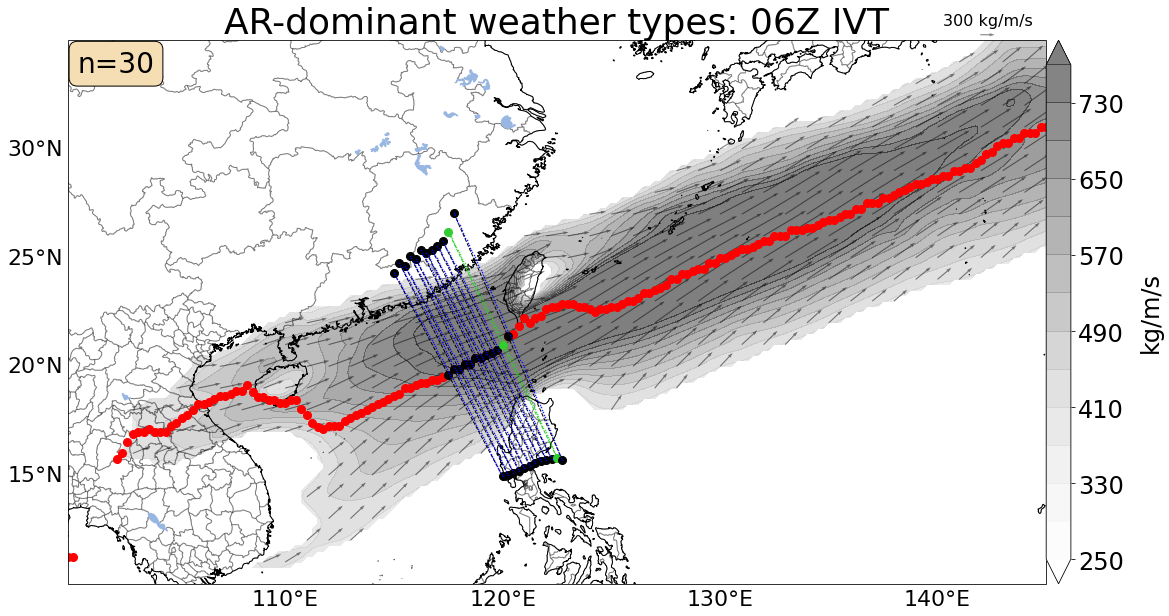

In [163]:
import matplotlib as mpl
month_dict={'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July','8':'August','9':'September','10':'October','11':'November','12':'December'}    
proj_map = ccrs.PlateCarree()
fig = plt.figure(figsize=(24,10))
ax=plt.subplot(1,1,1,projection=proj_map)
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.STATES.with_scale('10m'),alpha=0.3)
ax.add_feature(cfeature.LAKES.with_scale('50m'))
countries = cfeature.NaturalEarthFeature(category='cultural',name='admin_0_boundary_lines_land',scale='50m',facecolor='none')
ax.add_feature(countries)
ax.set_extent([100,145,10,35],crs=ccrs.PlateCarree())

ivt_mag_mean=ivt_mag_mean.where(ivt_mag_mean>=400.)
ivtx_mean=ivtx_mean.where(ivt_mag_mean>=400.)
ivty_mean=ivty_mean.where(ivt_mag_mean>=400.)

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160]
yticks = [5,10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
ax.tick_params(labelsize=20)
g1=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,alpha=0)
g1.xformatter=LONGITUDE_FORMATTER
g1.yformatter=LATITUDE_FORMATTER
g1.xlabel_style={'size':22,'color':'k'}
g1.ylabel_style={'size':22,'color':'k'}
g1.top_labels=False
g1.right_labels=False

#cax=ax.scatter(lons_extreme_list,lats_extreme_list,s=150,c=obs_extreme_list,transform=ccrs.PlateCarree(),vmin=0,vmax=120,cmap=plt.cm.RdYlGn_r,zorder=10)
cax1=ax.contourf(ivt_mag_mean.longitude,ivt_mag_mean.latitude,ivt_mag_mean,levels=np.arange(250,800,40),extend='both',transform=ccrs.PlateCarree(),cmap=plt.cm.Greys,alpha=0.5)
cbar=plt.colorbar(cax1,pad=0,fraction=0.046)
cbar.set_label('kg/m/s',fontsize=24,rotation=90,labelpad=15)
cbar.ax.tick_params(labelsize=24)

lats=ivt_mag_mean.latitude.values.tolist()
lons=ivt_mag_mean.longitude.values.tolist()
mean_lats_list=[]
for i in range(ivt_mag_mean.longitude.size):
    lon=ivt_mag_mean.longitude.values[i]
    ivt_mag_slice=ivt_mag_mean[:,i].values.tolist()
    zipped=list(zip(lats,ivt_mag_slice))
    select_lats=[x[0] for x in zipped if x[1]>0]
    if len(select_lats)>0:
        mean_lat=float(sum(select_lats))/float(len(select_lats))
        mean_lats_list.append(mean_lat)
        ax.plot(lon,mean_lat,'ro',transform=ccrs.PlateCarree(),markersize=8)
    else:
        mean_lats_list.append(np.nan)
        
x_north_list=[]
y_north_list=[]
x_south_list=[]
y_south_list=[]
for n in range(150,162):#define transects and get endpoints
    lon_index=n
    lon=lons[lon_index]
    lat=mean_lats_list[lon_index]

    if lat%0.25!=0:
        lat_indices=np.arange(len(lats))
        lat_distances=[abs(lat-x) for x in lats]
        zipped_distances=list(zip(lat_indices,lat_distances))
        sorted_distances=sorted(zipped_distances,key=lambda x:x[1])
        first_two=sorted_distances[0:2]
        if first_two[0][1]==first_two[1][1]:
            print('YES 1')
            ivtx_1=ivtx_mean.sel(latitude=lats[first_two[0][0]],longitude=lon).values.tolist()
            ivty_1=ivty_mean.sel(latitude=lats[first_two[0][0]],longitude=lon).values.tolist()

            ivtx_2=ivtx_mean.sel(latitude=lats[first_two[1][0]],longitude=lon).values.tolist()
            ivty_2=ivty_mean.sel(latitude=lats[first_two[1][0]],longitude=lon).values.tolist()

            ivtx_point=(ivtx_1+ivtx_2)/2.
            ivty_point=(ivty_1+ivty_2)/2.

        else:
            print('YES 2')
            ivtx_point=ivtx_mean.sel(latitude=lats[first_two[0][0]],longitude=lon)
            ivty_point=ivty_mean.sel(latitude=lats[first_two[0][0]],longitude=lon)

    else:
        ivtx_point=ivtx_mean.sel(latitude=lat,longitude=lon).values.tolist()
        ivty_point=ivty_mean.sel(latitude=lat,longitude=lon).values.tolist()

    #print((lon,lat))
    #print((ivtx_point,ivty_point))

    #have point and slope
    #(y-y1)=m(x-x1)
    #(y-lat)=(-1.*ivtx_point/ivty_point)*(x-lon)
    #choose x = 2 deg longitude

    y_south=lat-2.5*ivtx_point/ivty_point
    x_south=lon+2.5

    y_north=lat+2.5*ivtx_point/ivty_point
    x_north=lon-2.5
    
    x_north_list.append(x_north)
    y_north_list.append(y_north)
    x_south_list.append(x_south)
    y_south_list.append(y_south)

    if n==160:
        ax.plot(x_south,y_south,marker='o',color='limegreen',transform=ccrs.PlateCarree(),markersize=8)
        ax.plot(x_north,y_north,marker='o',color='limegreen',transform=ccrs.PlateCarree(),markersize=8)
        ax.plot(lon,lat,marker='o',color='limegreen',transform=ccrs.PlateCarree(),markersize=8)
        ax.plot([x_south,x_north],[y_south,y_north],color='limegreen',transform=ccrs.Geodetic(),linewidth=1.0,linestyle='--')
    else:
        ax.plot(x_south,y_south,'ko',transform=ccrs.PlateCarree(),markersize=8)
        ax.plot(x_north,y_north,'ko',transform=ccrs.PlateCarree(),markersize=8)
        ax.plot(lon,lat,'ko',transform=ccrs.PlateCarree(),markersize=8)
        ax.plot([x_south,x_north],[y_south,y_north],color='k',transform=ccrs.Geodetic(),linewidth=1.0,linestyle='--')


#check endpoints - then can put into ncl script to take data cross-sections
print(x_north_list)
print(y_north_list)
print(x_south_list)
print(y_south_list)

#once ncl script has been run
for l in range(12):
    print(l)
    dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_'+str(l)+'.nc')
    lats_gc=dr1.lats.values.tolist()
    lons_gc=dr1.lons.values.tolist()
    if l==10:
        for i in range(len(lats_gc)):
            ax.plot(lons_gc[i],lats_gc[i],marker='o',color='limegreen',transform=ccrs.PlateCarree(),markersize=0.5)
    else:
        for i in range(len(lats_gc)):
            ax.plot(lons_gc[i],lats_gc[i],'bo',transform=ccrs.PlateCarree(),markersize=0.5)
#c=ax.contour(slp_mean.longitude,slp_mean.latitude,slp_mean,transform=ccrs.PlateCarree(),colors='k',levels=np.arange(960,1040,4))
#plt.clabel(c,fmt='%.00f',fontsize=15)
X=4
q=ax.quiver(ivtx_mean.longitude[0::X].values,ivtx_mean.latitude[0::X].values,ivtx_mean[0::X,0::X].values,ivty_mean[0::X,0::X].values,transform=ccrs.PlateCarree(),units='inches',scale=1500,width=0.015,alpha=0.5)
ax.quiverkey(q,0.94,1.01,300,'300 kg/m/s',fontproperties={'size':16})
ax.set_title('AR-dominant weather types: 06Z IVT',fontsize=36)
#plt.legend(loc='upper left',fontsize=20)        
mpl.rcParams['hatch.linewidth']=0.01
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)
ax.text(0.01, 0.9825,'n='+str(len(dates_ar)), transform=ax.transAxes, fontsize=28,verticalalignment='top', bbox=props,zorder=30)
plt.show()

In [164]:
fig.savefig(dir+'taiwan_xc_schematics_1.png')

In [ ]:
for l in range(10,11):
    print(l)
    dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_'+str(l)+'.nc')
    mflux_x=dr1.trans_x
    mflux_y=dr1.trans_y
    mflux_mag=np.sqrt(mflux_x**2+mflux_y**2)
    
    lat_right=y_south_list[l]
    lat_left=y_north_list[l]
    lon_right=x_south_list[l]
    lon_left=x_north_list[l]

    vector_xc=[lon_left-lon_right,lat_left-lat_right]
    unit_vector_xc=vector_xc/np.linalg.norm(vector_xc)
    perps_all_cross=1.*(mflux_x*unit_vector_xc[1]-mflux_y*unit_vector_xc[0])
    
    dk=xr.Dataset()
    dk['mflux_perp']=(('time','level','transect'),perps_all_cross)
    dk.coords['time']=perps_all_cross.time
    dk.coords['level']=perps_all_cross.level
    dk.coords['transect']=perps_all_cross.transect
    
    try:
        os.remove(dir+'taiwan_mflux_cross_section_perp_'+str(l)+'.nc')
    except OSError:
        pass
    dk.to_netcdf(dir+'taiwan_mflux_cross_section_perp_'+str(l)+'.nc',mode='w',format='NETCDF4')

In [177]:
for l in range(10,11):
    print(l)
    dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_uvq_'+str(l)+'.nc')
    u=dr1.trans_u
    v=dr1.trans_v
    
    lat_right=y_south_list[l]
    lat_left=y_north_list[l]
    lon_right=x_south_list[l]
    lon_left=x_north_list[l]

    vector_xc=[lon_left-lon_right,lat_left-lat_right]
    unit_vector_xc=vector_xc/np.linalg.norm(vector_xc)
    perps_all_cross=1.*(u*unit_vector_xc[1]-v*unit_vector_xc[0])
    
    dk=xr.Dataset()
    dk['wind_perp']=(('time','level','transect'),perps_all_cross)
    dk.coords['time']=perps_all_cross.time
    dk.coords['level']=perps_all_cross.level
    dk.coords['transect']=perps_all_cross.transect
    
    try:
        os.remove(dir+'taiwan_mflux_cross_section_perp_wind_'+str(l)+'.nc')
    except OSError:
        pass
    dk.to_netcdf(dir+'taiwan_mflux_cross_section_perp_wind_'+str(l)+'.nc',mode='w',format='NETCDF4')

10


In [ ]:
for i in range(41):
    print(i)
    year=1979+i
    base=dt.datetime(year,5,15,6)#middle of first day (starts 18Z on 14th)
    dates_list_mys=[base+dt.timedelta(days=x) for x in range(47)]
    ds=xr.open_dataset(dir1a+'rain.'+str(year)+'.daily.1km-grid-v2.nc')
    p=ds.rain
    dates=[]
    for j in range(len(ds.time)):
        dates.append(dt.datetime(year,1,1,6)+dt.timedelta(j))
    p['time']=dates#now have datetime objects
    p_mys=p.sel(time=dates_list_mys)

    if i==0:
        p_mys_all=p_mys
    else:
        p_mys_all=xr.concat([p_mys_all,p_mys],dim='time')
p_daily_means=p_mys_all.mean(dim=('lat','lon'),skipna=True)

In [ ]:
l=11
dc=xr.open_dataset(dir+'taiwan_mflux_cross_section_perp_'+str(l)+'.nc')
mflux_perp=dc['mflux_perp']
if 1==0:
    mflux_ar=mflux_perp.sel(time=dates_ar)
    mflux_ar_mean=mflux_ar.mean(dim='time')
if 1==0:
    mflux_ar_mean=mflux_perp.mean(dim='time')
    
dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_'+str(l)+'.nc')
lats_gc=dr1.lats.values.tolist()
lons_gc=dr1.lons.values.tolist()
print(len(lats_gc))

fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)
first=mflux_ar_mean*1000.

lat_north=round(lats_gc[0],2)
lat_south=round(lats_gc[-1],2)
lon_north=round(lons_gc[0],2)
lon_south=round(lons_gc[-1],2)

#cax=ax.contourf(first.transect,first.level,first,extend='both',levels=np.arange(-300,320,20),cmap=plt.cm.bwr)
cax=ax.contourf(first.transect,first.level,first,extend='both',levels=np.arange(-100,110,10),cmap=plt.cm.bwr)
cbar=plt.colorbar(cax,pad=0,fraction=0.046)
plt.gca().invert_yaxis()
ax.tick_params(labelsize=18)
ax.set_title('Cross-section '+str(l+1),fontsize=32)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('g/kg*m/s',fontsize=18)
ax.set_xlabel('Cross-section points',fontsize=18)
ax.set_ylabel('Pressure level (hPa)',fontsize=18)
ax.text(-1,1027,str(lon_north)+'E',fontsize=15)
ax.text(-1,1047,str(lat_north)+'N',fontsize=15)

ax.text(90,1027,str(lon_south)+'E',fontsize=15)
ax.text(90,1047,str(lat_south)+'N',fontsize=15)

plt.xticks([0,20,40,60,80,98])
ax.set_xticklabels(['','20','40','60','80',''])

ax.set_xlim(0,98)

ax.grid(linestyle='--',color='k',linewidth=0.5,alpha=0.5)
plt.show()

In [63]:
fig.savefig(dir+'taiwan_xc_schematics_xc1.png')

100


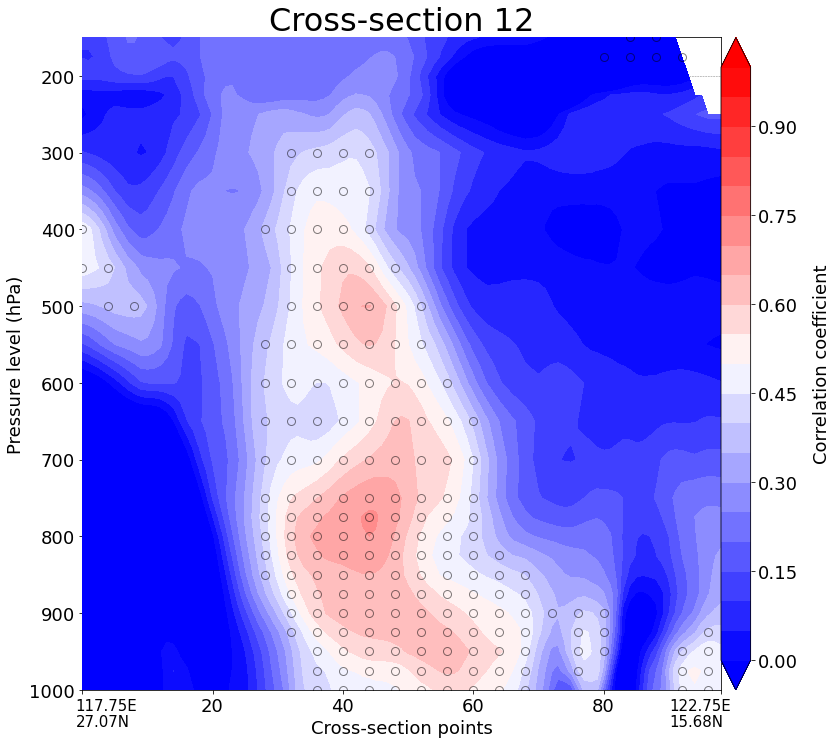

In [134]:
import scipy.stats as st
l=11
dc=xr.open_dataset(dir+'taiwan_mflux_cross_section_perp_'+str(l)+'.nc')
mflux_perp=dc['mflux_perp']
    
mflux_perp_daily=xr.zeros_like(mflux_perp[0::4])
for i in range(int(mflux_perp.time.size/4)):
    mflux_perp_daily[i,:,:]=mflux_perp[4*i:4*(i+1),:,:].mean(dim='time',skipna=True).values

times=pd.DatetimeIndex(mflux_perp_daily.time.values)
times_new=[x+dt.timedelta(hours=12) for x in times]
mflux_perp_daily['time']=times_new

fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)

mflux_ar_daily=mflux_perp_daily.sel(time=dates_ar)
p_ar_daily=p_daily_means.sel(time=dates_ar).values.tolist()

corr_array=xr.zeros_like(mflux_ar_daily[0,:,:])
for i in range(mflux_perp_daily.level.size):
    for j in range(mflux_perp_daily.transect.size):
        time_series_mflux=mflux_ar_daily[:,i,j].values.tolist()
        nonzero=[x for x in time_series_mflux if x>0]
        if len(nonzero)>0:
            corr=st.pearsonr(time_series_mflux,p_ar_daily)
            val=corr[0]
            p_val=corr[1]
        else:
            val=np.nan
            p_val=np.nan
        corr_array[i,j]=val

dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_'+str(l)+'.nc')
lats_gc=dr1.lats.values.tolist()
lons_gc=dr1.lons.values.tolist()
print(len(lats_gc))

first=corr_array

lat_north=round(lats_gc[0],2)
lat_south=round(lats_gc[-1],2)
lon_north=round(lons_gc[0],2)
lon_south=round(lons_gc[-1],2)

#cax=ax.contourf(first.transect,first.level,first,extend='both',levels=np.arange(-300,320,20),cmap=plt.cm.bwr)
cax=ax.contourf(first.transect,first.level,first,extend='both',levels=np.arange(0,1.05,0.05),cmap=plt.cm.bwr,zorder=19)
cbar=plt.colorbar(cax,pad=0,fraction=0.046)
plt.gca().invert_yaxis()
ax.tick_params(labelsize=18)
ax.set_title('Cross-section '+str(l+1),fontsize=32)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Correlation coefficient',fontsize=18,labelpad=15)
ax.set_xlabel('Cross-section points',fontsize=18)
ax.set_ylabel('Pressure level (hPa)',fontsize=18)
ax.text(-1,1027,str(lon_north)+'E',fontsize=15)
ax.text(-1,1047,str(lat_north)+'N',fontsize=15)

for i in range(mflux_perp_daily.level.size):
    for j in range(mflux_perp_daily.transect.size):
         if j%4==0:
            time_series_mflux=mflux_ar_daily[:,i,j].values.tolist()
            nonzero=[x for x in time_series_mflux if x>0]
            if len(nonzero)>0:
                corr=st.pearsonr(time_series_mflux,p_ar_daily)
                val=corr[0]
                p_val=corr[1]
            else:
                val=np.nan
                p_val=np.nan
            if p_val<=0.05:
                ax.plot(mflux_perp_daily.transect[j],mflux_perp_daily.level[i],'ko',markerfacecolor='None',markersize=8,mew=1,zorder=20,alpha=0.5)


ax.text(90,1027,str(lon_south)+'E',fontsize=15)
ax.text(90,1047,str(lat_south)+'N',fontsize=15)

plt.xticks([0,20,40,60,80,98])
ax.set_xticklabels(['','20','40','60','80',''])

ax.set_xlim(0,98)
ax.set_ylim(1000,150)

ax.grid(linestyle='--',color='k',linewidth=0.5,alpha=0.5)
plt.show()

In [135]:
fig.savefig(dir+'taiwan_xc_schematics_climo_xc12.png')

100


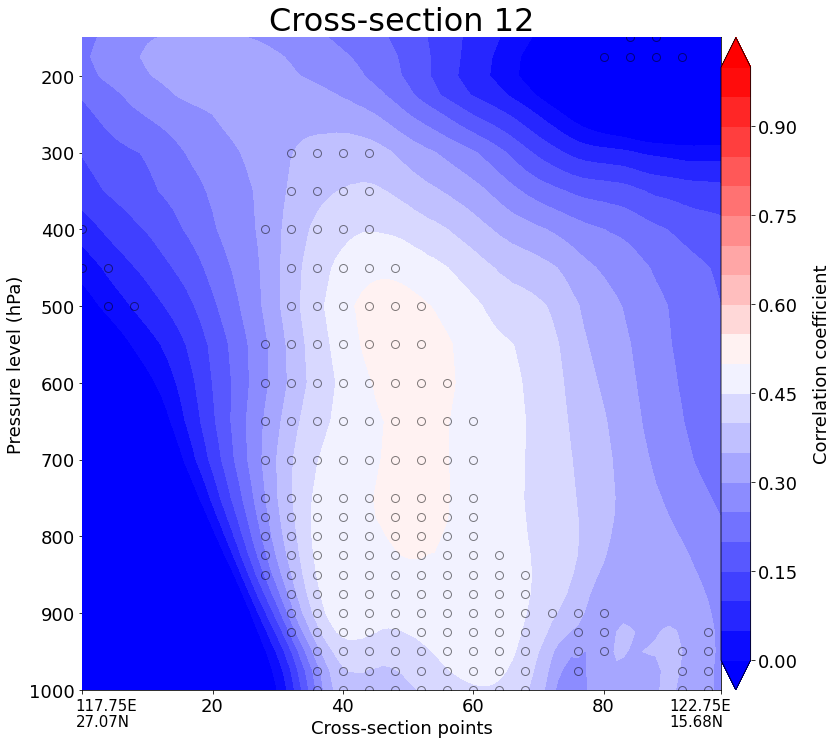

In [158]:
import scipy.stats as st
l=11
dc=xr.open_dataset(dir+'taiwan_mflux_cross_section_perp_'+str(l)+'.nc')
mflux_perp=dc['mflux_perp']
    
mflux_perp_daily=xr.zeros_like(mflux_perp[0::4])
for i in range(int(mflux_perp.time.size/4)):
    mflux_perp_daily[i,:,:]=mflux_perp[4*i:4*(i+1),:,:].mean(dim='time',skipna=True).values

times=pd.DatetimeIndex(mflux_perp_daily.time.values)
times_new=[x+dt.timedelta(hours=12) for x in times]
mflux_perp_daily['time']=times_new

fig=plt.figure(figsize=(12,12))
ax=plt.subplot(1,1,1)

p_daily=p_daily_means.values.tolist()

corr_array=xr.zeros_like(mflux_ar_daily[0,:,:])
for i in range(mflux_perp_daily.level.size):
    for j in range(mflux_perp_daily.transect.size):
        time_series_mflux=mflux_perp_daily[:,i,j].values.tolist()
        nonzero=[x for x in time_series_mflux if x>0]
        if len(nonzero)>0:
            corr=st.pearsonr(time_series_mflux,p_daily)
            val=corr[0]
            p_val=corr[1]
        else:
            val=np.nan
            p_val=np.nan
        corr_array[i,j]=val

dr1=xr.open_dataset(dir+'taiwan_mflux_cross_section_'+str(l)+'.nc')
lats_gc=dr1.lats.values.tolist()
lons_gc=dr1.lons.values.tolist()
print(len(lats_gc))

first=corr_array

lat_north=round(lats_gc[0],2)
lat_south=round(lats_gc[-1],2)
lon_north=round(lons_gc[0],2)
lon_south=round(lons_gc[-1],2)

#cax=ax.contourf(first.transect,first.level,first,extend='both',levels=np.arange(-300,320,20),cmap=plt.cm.bwr)
cax=ax.contourf(first.transect,first.level,first,extend='both',levels=np.arange(0,1.05,0.05),cmap=plt.cm.bwr,zorder=19)
cbar=plt.colorbar(cax,pad=0,fraction=0.046)
plt.gca().invert_yaxis()
ax.tick_params(labelsize=18)
ax.set_title('Cross-section '+str(l+1),fontsize=32)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Correlation coefficient',fontsize=18,labelpad=15)
ax.set_xlabel('Cross-section points',fontsize=18)
ax.set_ylabel('Pressure level (hPa)',fontsize=18)
ax.text(-1,1027,str(lon_north)+'E',fontsize=15)
ax.text(-1,1047,str(lat_north)+'N',fontsize=15)

for i in range(mflux_perp_daily.level.size):
    for j in range(mflux_perp_daily.transect.size):
         if j%4==0:
            time_series_mflux=mflux_ar_daily[:,i,j].values.tolist()
            nonzero=[x for x in time_series_mflux if x>0]
            if len(nonzero)>0:
                corr=st.pearsonr(time_series_mflux,p_ar_daily)
                val=corr[0]
                p_val=corr[1]
            else:
                val=np.nan
                p_val=np.nan
            if p_val<=0.05:
                ax.plot(mflux_perp_daily.transect[j],mflux_perp_daily.level[i],'ko',markerfacecolor='None',markersize=8,mew=1,zorder=20,alpha=0.5)


ax.text(90,1027,str(lon_south)+'E',fontsize=15)
ax.text(90,1047,str(lat_south)+'N',fontsize=15)

plt.xticks([0,20,40,60,80,98])
ax.set_xticklabels(['','20','40','60','80',''])

ax.set_xlim(0,98)
ax.set_ylim(1000,150)

ax.grid(linestyle='--',color='k',linewidth=0.5,alpha=0.5)
plt.show()

In [159]:
fig.savefig(dir+'taiwan_xc_schematics_climoall_xc12.png')

In [171]:
try:
    df.close()
except:
    pass
df=xr.open_dataset(dir+'taiwan_ivt_cross_section_10.nc')
ivtx=df.trans_x
ivty=df.trans_y

In [172]:
l=10
lat_right=y_south_list[l]
lat_left=y_north_list[l]
lon_right=x_south_list[l]
lon_left=x_north_list[l]
    
vector_xc=[lon_left-lon_right,lat_left-lat_right]
unit_vector_xc=vector_xc/np.linalg.norm(vector_xc)
perps_all_cross=1.*(ivtx*unit_vector_xc[1]-ivty*unit_vector_xc[0])

In [175]:
dk=xr.Dataset()
dk['ivt_cross']=(('time','transect'),perps_all_cross)
dk.coords['time']=perps_all_cross.time
dk.coords['transect']=perps_all_cross.transect
os.remove(dir+'taiwan_ivt_xc_perp.nc')
dk.to_netcdf(dir+'taiwan_ivt_xc_perp.nc',mode='w',format='NETCDF4')